# 匯入套件&資料集

In [1]:
import pandas as pn
import numpy as np

from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import mean_absolute_percentage_error #MAPE

from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import np_utils
from keras import backend as K
from keras.layers import Dense, Activation, Flatten

from keras.models import Sequential
from matplotlib import pyplot as plt
import matplotlib.pyplot as mp
#from sklearn.metrics import accuracy_score, recall_score
#import pydotplus

In [2]:
def mae_m(y_true, y_pred):
    return K.mean(K.abs(y_true - y_pred))

def mse_m(y_true, y_pred):
     return K.mean(K.square(y_true - y_pred))

def rmse_m(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_true - y_pred)))   

def mape_m(y_true, y_pred):
     return K.mean(K.abs((y_true - y_pred)/ y_true ))

In [3]:
pwd

'C:\\Users\\jim87\\Desktop\\ML作業\\第一次作業'

In [4]:
adult_x_train = pn.read_csv('adult.data', header=None,  names=["age","workclass","fnlwgt","education","education_num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","money"])
adult_x_test = pn.read_csv('adult.test', skiprows = 1, header=None,  names=["age","workclass","fnlwgt","education","education_num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","money"])

In [5]:
adult_x_train

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,money
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
adult_x_test

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,money
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


# 資料量化

In [7]:
def dataCleaning(dataSet):
    #刪去不相關欄位
    dataSet.drop('fnlwgt',axis=1, inplace=True)         
    dataSet.drop('education',axis=1, inplace=True)      
    dataSet.drop('capital-gain',axis=1, inplace=True)   
    dataSet.drop('capital-loss',axis=1, inplace=True)   
    dataSet = dataSet.replace(' ?', np.nan)
    #缺失值處理，採用眾數替換法（mode（）方法取眾數）
    dataSet.fillna(value={'workclass':dataSet['workclass'].mode()[0],   #Workclass
                          'occupation':dataSet['occupation'].mode()[0],   #Occupation  
                          'native-country':dataSet['native-country'].mode()[0]}, #Native country
              inplace = True)  
    
    #量化_換成number 0 1 2 3 (量化)
    workclass = list(set(dataSet['workclass']))
    for i in range(len(workclass)):
        row = dataSet['workclass'] == workclass[i]
        dataSet.loc[row,'workclass'] = i
    dataSet['workclass'] = dataSet['workclass'].astype(np.int64)
    
    maritalStatus = list(set(dataSet['marital-status']))
    for i in range(len(maritalStatus)):
        row = dataSet['marital-status'] == maritalStatus[i]
        dataSet.loc[row,'marital-status'] = i
    dataSet['marital-status'] = dataSet['marital-status'].astype(np.int64)
        
    occupation = list(set(dataSet['occupation']))
    for i in range(len(occupation)):
        row = dataSet['occupation'] == occupation[i]
        dataSet.loc[row,'occupation'] = i
    dataSet['occupation'] = dataSet['occupation'].astype(np.int64)
    
    relationship = list(set(dataSet['relationship']))
    for i in range(len(relationship)):
        row = dataSet['relationship'] == relationship[i]
        dataSet.loc[row,'relationship'] = i
    dataSet['relationship'] = dataSet['relationship'].astype(np.int64)
    
    race = list(set(dataSet['race']))
    for i in range(len(race)):
        row = dataSet['race'] == race[i]
        dataSet.loc[row,'race'] = i
    dataSet['race'] = dataSet['race'].astype(np.int64)
    
    sex = list(set(dataSet['sex']))
    for i in range(len(sex)):
        row = dataSet['sex'] == sex[i]
        dataSet.loc[row,'sex'] = i
    dataSet['sex'] = dataSet['sex'].astype(np.int64)
    
    nativeCountry = list(set(dataSet['native-country']))
    for i in range(len(nativeCountry)):
        row = dataSet['native-country'] == nativeCountry[i]
        dataSet.loc[row,'native-country'] = i
    dataSet['native-country'] = dataSet['native-country'].astype(np.int64)
    
    money = {' <=50K': 0, ' >50K': 1,' <=50K.': 0, ' >50K.': 1}
    try:
        dataSet['money'] = dataSet['money'].map(money)
    except:
        i = 1#不做處理
    else:
        i = 1
        
    
    
    return dataSet
    

In [8]:
adult_x_train = dataCleaning(adult_x_train)
adult_x_train

,age,workclass,education_num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,money
0,39,0,13,5,1,0,0,0,40,4,0
1,50,3,13,1,10,5,0,0,13,4,0
2,38,1,9,2,2,0,0,0,40,4,0
3,53,1,7,1,2,5,4,0,40,4,0
4,28,1,13,1,13,2,4,1,40,27,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,1,12,1,7,2,0,1,38,4,0
32557,40,1,9,1,9,5,0,0,40,4,1
32558,58,1,9,6,1,1,0,1,40,4,0
32559,22,1,9,5,1,3,0,0,20,4,0


In [9]:
adult_x_test = dataCleaning(adult_x_test)
adult_x_test

,age,workclass,education_num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,money
0,25,1,7,5,8,3,4,0,40,4,0
1,38,1,9,1,0,5,0,0,50,4,0
2,28,4,12,1,11,5,0,0,40,4,1
3,44,1,10,1,8,5,4,0,40,4,1
4,18,1,10,5,13,3,0,1,30,4,0
...,...,...,...,...,...,...,...,...,...,...,...
16276,39,1,13,2,13,0,0,1,36,4,0
16277,64,1,9,6,13,4,4,0,40,4,0
16278,38,1,13,1,13,5,0,0,50,4,0
16279,44,1,13,2,1,3,1,0,40,4,0


# 檢查缺失值

In [10]:
adult_x_train.isnull().sum()

age               0
workclass         0
education_num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
money             0
dtype: int64

In [11]:
adult_x_test.isnull().sum()

age               0
workclass         0
education_num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
money             0
dtype: int64

In [12]:
adult_x_test.dtypes

age               int64
workclass         int64
education_num     int64
marital-status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
hours-per-week    int64
native-country    int64
money             int64
dtype: object

# 設定答案

In [13]:
#設定答案
adult_y_train = adult_x_train.pop('hours-per-week')
adult_y_test = adult_x_test.pop('hours-per-week')
print("X_train original shape", adult_x_train.shape)
print("y_train original shape", adult_y_train.shape)
adult_x_test.shape

X_train original shape (32561, 10)
y_train original shape (32561,)


(16281, 10)

# 模型建模

In [15]:
#建立Sequential物件
network = models.Sequential()

#unit,input_shape,activation分別代表10個神經元、輸入資料維度8、激活函數用relu 
network.add(layers.Dense(10, activation='relu', input_shape=(adult_x_train.shape[1],)))

#新增第2層隱藏層，8個神經元
network.add(layers.Dense(8, activation='tanh'))
network.add(layers.Dense(8, activation='tanh'))
network.add(layers.Dense(8, activation='tanh'))
network.add(layers.Dense(8, activation='tanh'))
#輸出層，Sigmoid
network.add(layers.Dense(1))
network.add(Flatten())
network.compile(optimizer='sgd', loss='mse',metrics=[mae_m,rmse_m,mape_m])

network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
 flatten (Flatten)           (None, 1)                 0

# 正規化

In [14]:
#正規化
adult_x_train = adult_x_train.values.reshape(32561, 10)
adult_x_test = adult_x_test.values.reshape(16281, 10)
adult_x_train = adult_x_train.astype("float32")
adult_x_test = adult_x_test.astype("float32")

#正規化測試資料 (0到1之間)
adult_x_train /= 255
adult_x_test /= 255

adult_y_train = np.asarray(adult_y_train).astype('float32').reshape((-1,1))
adult_y_test = np.asarray(adult_y_test).astype('float32').reshape((-1,1))

#訓練用最後輸入的維度
print("Train matrix shape", adult_x_train.shape)
print("Test matrix shape", adult_x_test.shape)



Train matrix shape (32561, 10)
Test matrix shape (16281, 10)


# 訓練&輸出

In [16]:
history =network.fit(adult_x_train, adult_y_train,epochs=300, batch_size=200, steps_per_epoch=500,  validation_steps=300)
loss, MAE, RMSE, MAPE =  network.evaluate(adult_x_test, adult_y_test)

Epoch 1/300
500/500 [==============================] - 1s 1ms/step - loss: 166.0619 - mae_m: 7.9472 - rmse_m: 12.6178 - mape_m: 0.3583
Epoch 2/300
500/500 [==============================] - 1s 1ms/step - loss: 152.7881 - mae_m: 7.5879 - rmse_m: 12.3242 - mape_m: 0.3556
Epoch 3/300
500/500 [==============================] - 1s 1ms/step - loss: 152.9116 - mae_m: 7.6060 - rmse_m: 12.3262 - mape_m: 0.3546
Epoch 4/300
500/500 [==============================] - 1s 1ms/step - loss: 151.9159 - mae_m: 7.5698 - rmse_m: 12.2912 - mape_m: 0.3524
Epoch 5/300
500/500 [==============================] - 1s 1ms/step - loss: 152.4879 - mae_m: 7.5868 - rmse_m: 12.3093 - mape_m: 0.3547
Epoch 6/300
500/500 [==============================] - 1s 1ms/step - loss: 152.8016 - mae_m: 7.5860 - rmse_m: 12.3236 - mape_m: 0.3524
Epoch 7/300
500/500 [==============================] - 1s 1ms/step - loss: 152.3703 - mae_m: 7.5990 - rmse_m: 12.3053 - mape_m: 0.3531
Epoch 8/300
500/500 [==============================] - 

In [17]:
#Y_predicted = network.predict(adult_x_test)
print('Loss:', np.round(loss, 4))
print('MAE: ', np.round(MAE, 4))
print('RMSE: ', np.round(RMSE, 4))
print('MAPE: ', np.round(MAPE, 4)*100, '%')

Loss: 155.741
MAE:  7.5551
RMSE:  12.2571
MAPE:  35.54 %


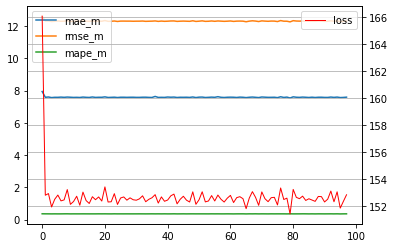

In [18]:
#設定答案
history_Loss = history.history.pop('loss')
fig, ax1 = plt.subplots() # 使用subplots()創建窗口
# 繪製折線圖像1, 標籤，線寬
ax1.plot(pn.DataFrame(history.history),label=history.history.keys()) 
mp.legend(loc=2)
ax2 = ax1.twinx() # 創建第二個座標軸
ax2.plot(history_Loss, c='r', label='loss', linewidth = 1) #同上, 'o-'
mp.legend(loc=1)
plt.grid(True)  # 樣式風格：網格型
plt.show()